# Chapter 18: Neural Networks

### Perceptrons
Perceptons are a simple model of a single neuron. They take in a vector of inputs, computes the dot product between the input vector and its internal weights, and "fires" if the dot product exceeds some threshold (usually 0)

In [1]:
# Import NotebookLoader
%run -i AddNBL.py
import Chapter4 as Ch4

def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """returns 1 if the perceptron 'fires', 0 otherwise"""
    calculation = Ch4.dot(weights, x) + bias
    return step_function(calculation)

importing Jupyter notebook from Chapter4.ipynb


### Feed Forward Neural Network
Modeling a single neuron is not all that useful since it is fundamentally limited to modelling only simple functions. In order to model more complicated behavior we will need to connect multiple neurons together in multiple layers.

In order to succesfully train this more complicated network we will need to use calculus which requires differentiable functions. Consequently we will replace the discrete `step_function` with a nice smooth `sigmoid` function.

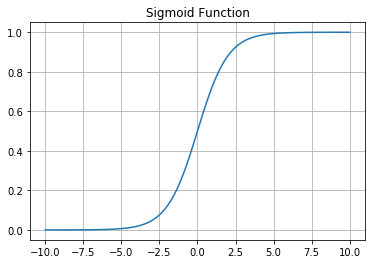

In [2]:
import my_utils, math
%matplotlib inline
import matplotlib.pyplot as plt
def sigmoid(t):
    """Apply the sigmoid function to t"""
    return 1 / (1 + math.exp(-t))

if __name__ == "__main__":
    n = 100
    x = my_utils.linspace(-10, 10, 100)
    y = [sigmoid(x_i) for x_i in x]
    plt.plot(x,y)
    plt.grid()
    plt.title("Sigmoid Function")
    plt.draw()

In [3]:
def neuron_output(weights, inputs):
    return sigmoid(Ch4.dot(weights, inputs))

### NN Feed Forward
Given the output function above we can represent a Neural Network as a List (Layers) of Lists (Neurons) of Lists (Weights).

With this representation we can "feed" an input vector "forward" through the network using the `feed_forward` method defined below:

In [4]:
def feed_forward(neural_network, input_vector):
    """
        takes in a neural network (represented as a list of lists of lists of weights)
        and returns the output from forward-propagating the input
    """
    
    # TODO: This list representaion only works in fully connected dags, think about 
    # more general implementation?
    
    outputs = []
    
    # process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        
        # the output of this layer is the input to the next layer
        input_vector = output
        
    return outputs

### Backpropagation
Rather than "wiring" a network by hand we want to train the neural network based on training data. One approach to this is using "backpropagation" which is similar to the gradient descent we used before (which requires the smooth error surface that the sigmoid function provides).

Imagine we have a set of input vectors and a corresponding set of output vectors. We then adjust the initial weights of the network according to the following algorithm:

1. Run `feed_forward` on an input vector to provide the output of all the neurons in the network.
2. This results in an error for each output neuron: the difference between the output and the expected output.
3. Compute the gradient of this error as a function of the weights of each neuron's weights. Use this gradient to adjust the weights in the direction which reduces the error the most.
4. Propagate these errors backward to infer the errors of the hidden layers
5. Compute the gradient of these errors and adjust the weights in the same manner

These steps are run many times until the network converges.